<h1>Blob Detection</h1>

Example 4.9

In [2]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray, rgba2rgb

import matplotlib.pyplot as plt

Use blob detection methods on Hubble Deep Field

1.69 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
758 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.8 s ± 66.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


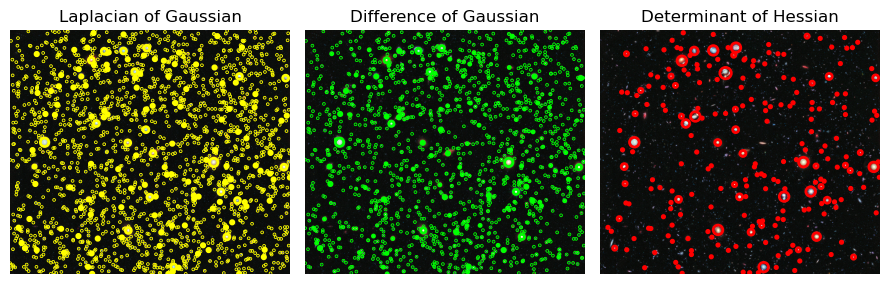

In [16]:
image = data.hubble_deep_field()
image_gray = rgb2gray(image)

%timeit blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

%timeit blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

%timeit blob_doh(image_gray, max_sigma=30, threshold=.01)
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.savefig('blobs_hdf')
plt.show()